In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits

In [32]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

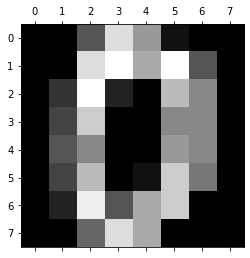

In [33]:
plt.gray()
plt.matshow(digits.images[0])

In [34]:
digits.target[0]

0

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [37]:
len(X_train)

1437

In [38]:
len(X_test)

360

In [39]:
# nsamples, nx, ny = X_train.shape
# X_train = X_train.reshape((nsamples, nx*ny))

# nsamples, nx, ny = X_test.shape
# X_test = X_test.reshape((nsamples, nx*ny))

In [40]:
model.fit(X_train, y_train)

C:\Users\saaketh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
model.score(X_test, y_test)

0.9555555555555556

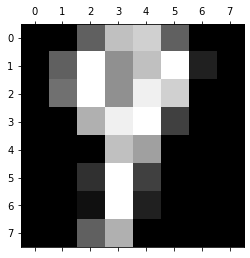

In [43]:
plt.matshow(digits.images[69])

In [45]:
digits.target[69]

9

In [49]:
model.predict([digits.images[69].reshape(64)])

array([9])

**To see where the model failed** (CONFUSION MATRIX)

In [71]:
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(X_test)

cm = confusion_matrix(y_test, y_predicted)
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 34]], dtype=int64)

Text(69.0, 0.5, 'Truth')

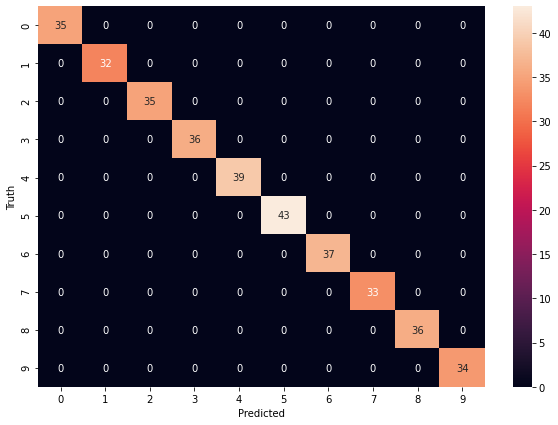

In [76]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')